In [1]:
from src.utils.core_utils import *
from src.utils.data_utils import load_intensifiers, extract_relevant_markers

The purpose of this notebook is to visualize the distribution of comments per community that have one of the Luo intensifiers.

It can only be run after luo_intensifiers.py.

In [2]:
def load_subreddit_marker_data(year):
    subreddit_to_marker_counter = Serialization.load_obj(f"all_luo_markers_{year}")
    df = pd.DataFrame(subreddit_to_marker_counter).fillna(0).T
    print(df.sum().sort_values().sum())
    return df

def compute_cutoffs(df, cutoff):
    totals = df.sum(axis=1)
    return totals[totals >= cutoff]

def graph_coms_with_markers(df, year):
    cutoffs = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
    com_counts = []
    for cutoff in cutoffs:
        num_communities = compute_cutoffs(df, cutoff).shape[0]
        com_counts.append(num_communities)

    plt.plot(np.log10(cutoffs), com_counts, marker='o')
    plt.xticks([0, 1, 2, 3, 4, 5, 6], labels = ["1", "10", "100", "1K", "10K", "100K", "1M"])
    plt.xlabel("Number of comments with stance markers (log-scale)")
    plt.ylabel("Number of communities")
    plt.title(f"Number of communities with at least n \nstance marker posts in {year}")
    plt.show()
    plt.clf()
    plt.plot(np.log10(cutoffs[-5:]), com_counts[-5:], marker='o')
    plt.xticks([4, 5, 6], labels = ["10K", "100K", "1M"])
    plt.xlabel("Number of comments with stance markers")
    plt.ylabel("Number of communities")
    plt.title(f"Number of communities with at least n \nstance marker posts {year} (zoomed in)")
    plt.show()
    plt.clf()


def plot_distinct_markers_per_community(df, year):
    community_totals = df.sum(axis=1)
    freq_coms = community_totals[community_totals>=10000].index
    print(df.shape)
    df = df.loc[freq_coms]
    print(df.shape)
    plt.hist(df.mask(df>0, 1).sum(axis=1))
    plt.xlabel("Number of Distinct Stancemarkers")
    plt.ylabel("Number of Communities")
    plt.title(f"Number of Communities with n Distinct Stancemarkers ({year})")
    plt.show()
    plt.clf()


# 2019 Analysis

In [3]:
year = '2019'
df = load_subreddit_marker_data(year)
year_df = df
year_10k_cutoff = compute_cutoffs(df, 10000)


142158436.0


In [25]:
frequent_data = year_df[year_df.index.isin(year_10k_cutoff.index)].T
marker_distribution_per_community = frequent_data.sort_index()
marker_distribution_per_community /= marker_distribution_per_community.sum()


In [2]:
# Serialization.save_obj(marker_distribution_per_community, "cogsci_2024_full_data_intensifier_distribution_per_community")
df = Serialization.load_obj("cogsci_2024_full_data_intensifier_distribution_per_community")

In [12]:
import sys
sys.path.append("/u/jai/efficiency/src")
from src.efficiency import *

In [15]:
all_communities = df.columns
all_communities = list(map(lambda x: x.lower(), all_communities))
DATA_SUFFIX = 'luo_data_2019_10k_sample_3_dim'
NUM_INTENSIFIERS = df.shape[0]
SMOOTHING_DELTA = 1e-10
com_to_original_df, com_to_encoder, com_to_needs, marker_to_df = generate_dataframe_mappings(DATA_SUFFIX, NUM_INTENSIFIERS, SMOOTHING_DELTA, exclude_askreddit=True)

In [17]:
used_communities = list(com_to_original_df.keys())

In [20]:
set_difference(used_communities, all_communities)

['vita', 'rage']

In [30]:
year = "2019"
marker_counts = Serialization.load_obj(f"cogsci_2024_all_luo_markers_{year}")
marker_df = pd.DataFrame(marker_counts).fillna(0).T

In [31]:
marker_df = marker_df[marker_df.index.isin(df.columns)]

In [36]:
marker_df.sum(axis=1).sort_values().sum()

116446430.0

In [40]:
pd.DataFrame(df.columns).to_csv("/u/jai/efficiency/data/cogsci_2024_communities.txt", header=None, index=None)

# Temporal Analysis 

In [10]:
YEARS = [str(year) for year in np.arange(2011, 2021)]

In [5]:
year_to_df = {}
year_to_10k_cutoff = {}
for year in YEARS:
    df = load_subreddit_marker_data(year)
    # graph_coms_with_markers(df, year)
    # plot_distinct_markers_per_community(df, year)
    year_to_df[year] = df
    year_to_10k_cutoff[year] = compute_cutoffs(df, 10000)


11512206.0
25297859.0
39255783.0
54155871.0
73363891.0
88562059.0
105979481.0
125080359.0
142158436.0
159045817.0


In [6]:
def community_temporal_overlap(year_to_data, base_year, test_year):
    base_data = year_to_data[base_year]
    test_data = year_to_data[test_year]

    overlapping = intersect_overlap(base_data.index, test_data.index)
    return overlapping


In [ ]:
year_to_num10k = [year_to_10k_cutoff[year].shape[0] for year in YEARS]
year_to_num10k_in_2019 = [len(community_temporal_overlap(year_to_10k_cutoff, "2019", year)) for year in YEARS]

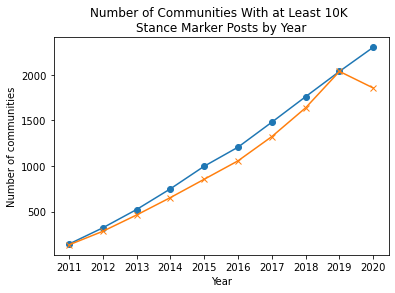

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(YEARS, year_to_num10k, marker='o')
plt.plot(YEARS, year_to_num10k_in_2019, marker='x')
plt.xlabel("Year")
plt.ylabel("Number of communities")
plt.title("Number of Communities With at Least 10K \nStance Marker Posts by Year")
plt.show()
plt.clf()


In [16]:
overlap_2013 = community_temporal_overlap(year_to_10k_cutoff, "2019", "2013")
with open("../data/communities_of_interest.txt", "w") as file:
    for c in overlap_2013:
        file.write(c)
        file.write("\n")

2037
522
462


In [26]:
agg_2011 = year_to_10k_cutoff['2011']
agg_2012 = year_to_10k_cutoff['2012']
agg_2013 = year_to_10k_cutoff['2013']
agg_2019 = year_to_10k_cutoff['2019']

In [5]:
curr_coms = df.sum(axis=1).sort_values().tail(1000).sample(5, random_state=1234).index

In [27]:
def load_text_file(year, communities_of_interest):
    files = os.listdir(PROCESSED_DATA_DIR)
    valid_files = sorted([file for file in files if str(year) in file])
    to_keep_df = []
    for filename in tqdm(valid_files):
        with open(PROCESSED_DATA_DIR + filename, "r") as file:
            for line in file:
                fline = json.loads(line)
                if fline['subreddit'] not in communities_of_interest:
                    continue
                to_keep_df.append(fline)
    return to_keep_df

In [28]:
dfs = load_text_file(year, curr_coms)

100%|██████████| 12/12 [15:44<00:00, 78.68s/it]


In [34]:
new_df = pd.DataFrame(dfs)
new_df.to_csv("/ais/hal9000/datasets/reddit/stance_pipeline/luo_tiny_test/current_data/test_data.csv")

In [8]:
new_df = pd.read_csv("/ais/hal9000/datasets/reddit/stance_pipeline/luo_tiny_test/current_data/test_data.csv", index_col=0)

/u/jai/miniconda3/envs/venv37/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [15]:
luo_intensifiers = set(load_intensifiers("luo_intensifiers.txt"))
new_df['rel_marker'] = new_df['body'].progress_apply(lambda x: extract_relevant_markers(x, luo_intensifiers)[0])

100%|██████████| 1190925/1190925 [01:20<00:00, 14877.31it/s]


In [17]:
import re
new_df['body_mask'] = new_df.progress_apply(lambda x: re.sub(x['rel_marker'], "[MASK]", x['body'].lower()), axis=1)

100%|██████████| 1190925/1190925 [00:20<00:00, 59267.54it/s]


In [18]:
new_df.to_csv("/ais/hal9000/datasets/reddit/stance_pipeline/luo_tiny_test/current_data/test_data.csv")